# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hemanglunagaria/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
print(news_api_key)

8776c960a93c458996d7c6362233a15d


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [30]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", page_size=100)
bitcoin_articles['totalResults']

7334

In [29]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en", page_size=100)
ethereum_articles['totalResults']

2319

In [21]:
# Function that will take the list of articles to create a sentiment scores and save it as a data frame
def getSentimentScores(articles):
    sentiments = []
    
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            positive = sentiment["pos"]
            neutral = sentiment["neu"]
            negative = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": positive,
                "negative": negative,
                "neutral": neutral
            })
        
        except AttributeError:
            pass
        
    sentiments_df = pd.DataFrame(sentiments)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    return sentiments_df[cols]

In [37]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = getSentimentScores(bitcoin_articles["articles"])
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [38]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = getSentimentScores(ethereum_articles["articles"])
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-08-03,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000
4,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895


In [39]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.100593,0.059200,0.032940,0.907840
std,0.394487,0.070342,0.058745,0.086862
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.029800,0.000000,0.000000,0.855250
50%,0.000000,0.049500,0.000000,0.919000
75%,0.386825,0.091000,0.062250,1.000000
max,0.883400,0.276000,0.287000,1.000000


In [40]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.0000,100.000000
mean,0.126042,0.048610,0.0202,0.931170
std,0.328485,0.061492,0.0426,0.072473
min,-0.812600,0.000000,0.0000,0.714000
25%,0.000000,0.000000,0.0000,0.878750
50%,0.000000,0.000000,0.0000,0.931500
75%,0.386825,0.085750,0.0000,1.000000
max,0.840200,0.237000,0.2490,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean postive score.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [31]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [35]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'due', 'would','could', 'also', 'said'}
sw = sw.union(sw_addons)
print(sw)

{'with', 'its', "wasn't", 'whom', 'his', 'nor', 'over', 'what', "don't", "she's", 'said', 'ma', 'when', 't', "it's", 'few', 'after', "hadn't", "won't", 'the', 'most', 'if', "that'll", "you've", 'only', 's', 'don', 'didn', 'we', 'doing', 'could', 'for', 'be', 'you', 'such', "shouldn't", 'both', 'have', 'during', 'not', 'ain', 'these', 'll', 'haven', "you're", 'under', 'ours', "needn't", 'are', 'had', 'between', 'and', 'there', 'did', "haven't", 'hers', 'me', 'once', 'itself', 'than', 'they', "should've", 'myself', 'any', 'more', 'hadn', "didn't", 'about', 'again', 'into', "aren't", 'below', 'to', 'am', 'where', 'them', 'up', 'herself', 'theirs', 'an', 'wouldn', "mustn't", 'now', 'out', 'isn', 'each', 'also', 'do', 'ourselves', "hasn't", 'hasn', 'how', 'themselves', 'through', 'too', 'weren', 'yourselves', 'been', 'then', 'my', 'our', 'just', 'needn', 're', 'he', 'will', 'down', 'but', 'because', 'y', 'shan', 'due', 'this', 'on', 'i', 'before', 'their', "doesn't", 'him', 'that', 'by', 'a

In [64]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_cleaned = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text_cleaned)
    
    # Lemmatize words into root words
    lemmetized_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lemmetized_words = [word.lower() for word in lemmetized_words]
    
    # Remove the stop words
    tokens = [word for word in lemmetized_words if word not in sw]
    
    return tokens

In [65]:
# Function to run tokeniser funtion created above for each row of the dataframe
def getTokens(row):
    return tokenizer(row['text'])

In [66]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.apply(getTokens, axis=1)
print(bitcoin_df.iloc[0]['text'])
print(bitcoin_df.iloc[0]['tokens'])

Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]
['like', 'dogecoin', 'devotee', 'mayor', 'reno', 'leader', 'el', 'salvador', 'aldo', 'baoicchi', 'convinced', 'cryptocurrency', 'future', 'ceo', 'founder', 'canadian', 'scooter', 'maker', 'daymak', 'belief', 'char']


In [67]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.apply(getTokens, axis=1)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [71]:
from collections import Counter
from nltk import ngrams

In [108]:
# Generate the Bitcoin N-grams where N=2
bitcoin_all_text = ''.join(bitcoin_df['text'])
bitcoin_all_text_processed = tokenizer(bitcoin_all_text)
bitcoin_bigrams = ngrams(bitcoin_all_text_processed, n=2)
# list(bitcoin_bigrams)

In [109]:
# Generate the Ethereum N-grams where N=2
ethereum_all_text = ''.join(ethereum_df['text'])
ethereum_all_text_processed = tokenizer(ethereum_all_text)
ethereum_bigrams = ngrams(ethereum_all_text_processed, n=2)

In [110]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [111]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = pd.DataFrame(list(dict(token_count(bitcoin_bigrams, N=10)).items()), columns=['bigram','count'])
bitcoin_top_10

,bigram,count
0,"(july, reuters)",15
1,"(illustration, taken)",13
2,"(taken, june)",10
3,"(virtual, currency)",8
4,"(illustration, picture)",7
5,"(representation, virtual)",6
6,"(currency, bitcoin)",6
7,"(bitcoin, ethereum)",5
8,"(bitcoin, seen)",5
9,"(charsby, reuters)",5


In [112]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = pd.DataFrame(list(dict(token_count(ethereum_bigrams, N=10)).items()), columns=['bigram','count'])
ethereum_top_10

,bigram,count
0,"(illustration, taken)",20
1,"(taken, june)",20
2,"(bitcoin, ethereum)",16
3,"(june, reutersdado)",15
4,"(cryptocurrencies, bitcoin)",14
5,"(ethereum, dogecoin)",14
6,"(placed, pc)",13
7,"(pc, motherboard)",13
8,"(motherboard, illustration)",13
9,"(dogecoin, ripple)",12


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

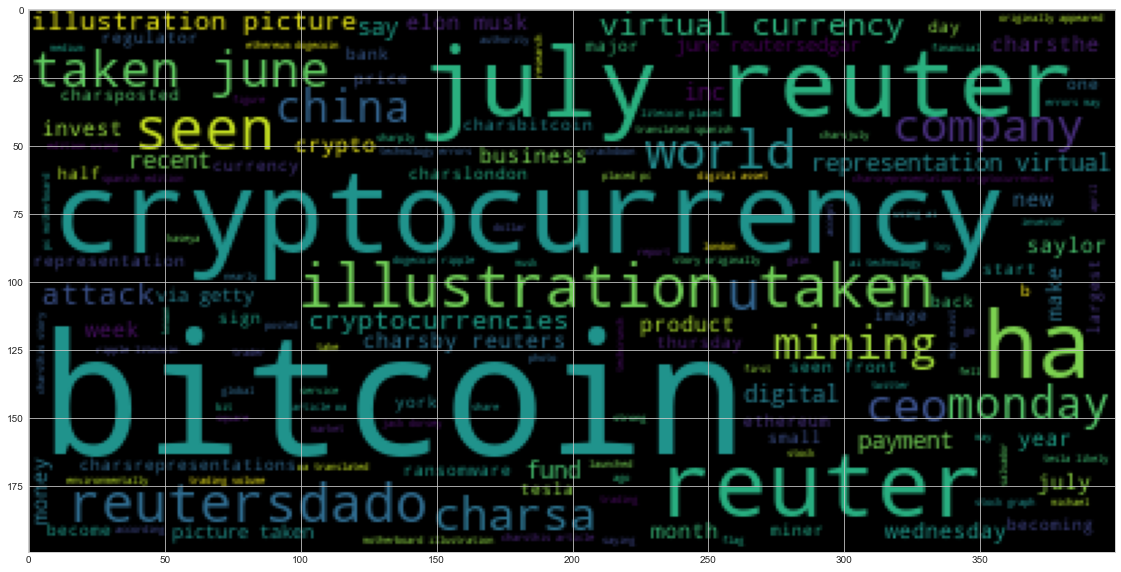

In [120]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_all_text_processed))
plt.imshow(bitcoin_wc)

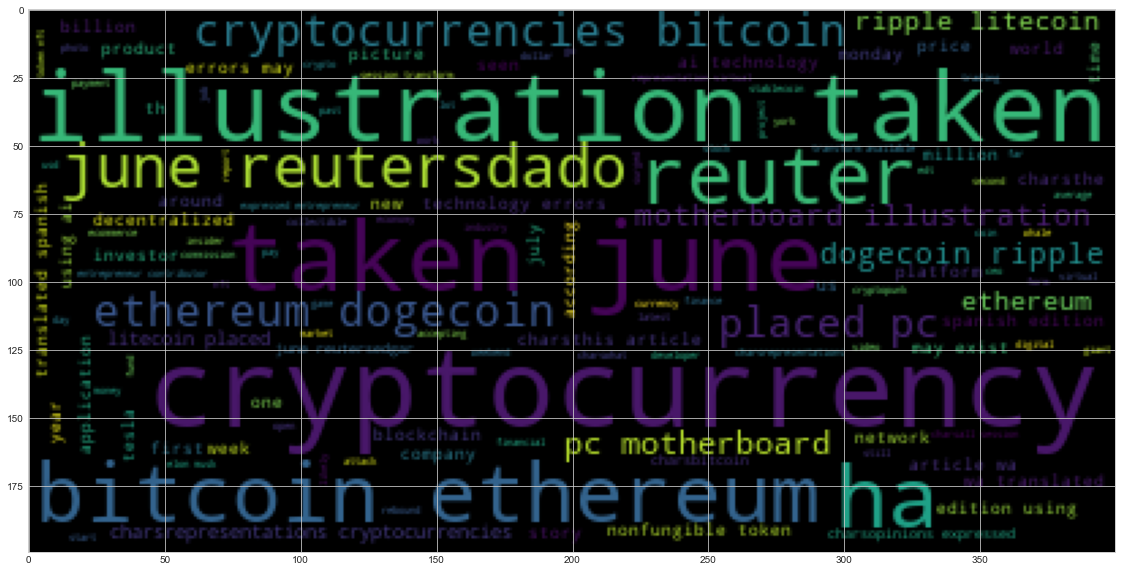

In [121]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(' '.join(ethereum_all_text_processed))
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [122]:
import spacy
from spacy import displacy

In [123]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [124]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_all_text = ''.join(bitcoin_df['text'])

In [129]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [136]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [137]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.label_ + ':' + ent.text)

GPE:Reno
GPE:El Salvador
GPE:Aldo Baoicchi
NORP:Canadian
ORG:Daymak
PERSON:Alex Castro
ORG:The Verge
DATE:Three days
DATE:the holiday weekend
MONEY:$70m
MONEY:£50.5m
DATE:every day
TIME:3 p.m. PDT
ORG:Daily Crunch
DATE:July 23, 2021
ORG:Bitcoin and Ethereum
DATE:2021
PERSON:Michael Arrington
LOC:TechCrunch
ORG:Crunchbase
PRODUCT:CrunchFund
DATE:Tuesday
DATE:2017
DATE:July 28
ORG:Reuters
MONEY:40,000
DATE:Wednesday
PERSON:chars]James Martin
GPE:UK
GPE:Spain
PRODUCT:Twitter
DATE:2020
ORG:the US Department of Justi
DATE:November 19, 2020
ORG:REUTERS
ORG:Dado Ruvic/IllustrationSINGAPORE
DATE:July 21
ORG:Reuters
ORG:Reuters
ORG:FILE
DATE:November 19, 2020
ORG:REUTERS
ORG:Dado Ruvic/Illustration
SINGAPORE
DATE:June 29, 2021
ORG:REUTERS
PERSON:Dado Ruvic
PERSON:Ju
ORG:Dado Ruvic/Illustration
Welcome
CARDINAL:10
ORG:the Opening Bell
ORDINAL:first
ORG:Entrepreneur
ORDINAL:first
DATE:more than three decades ago
DATE:six months ago
CARDINAL:dozens
DATE:February 9, 2021
ORG:REUTERS
GPE:Dado
ORG:Re

---

### Ethereum NER

In [132]:
# Concatenate all of the Ethereum text together
ethereum_all_text = ''.join(ethereum_df['text'])

In [133]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [134]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [135]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.label_ + ':' + ent.text)

PERSON:Ethereum
WORK_OF_ART:Ethereum Killers
PERSON:Solana
ORG:Bitcoin and Ethereum
DATE:2021
PERSON:Ethereum
DATE:June 29, 2021
ORG:REUTERS
PERSON:Dado Ruvic/IllustrationAug 3
ORG:Reuters
PERSON:Ethereum
DATE:Monday
ORG:Amazon
ORG:Amazon
PERSON:Di Iorio
PERSON:Ethereum
PERSON:Bloomberg
NORP:Slashdot
PERSON:Ethereum
DATE:June 29, 2021
ORG:REUTERS
PERSON:Dado Ruvic
DATE:July 30
ORG:Reuters
ORDINAL:second
MONEY:more than $13 billion
CARDINAL:2.0
PERSON:Photothek
MONEY:more than $13 billion
CARDINAL:2.0
PERSON:Livepeer
MONEY:$20 million
PERSON:Ethereum
NORP:Spanish
ORG:AI
PERSON:Xoy Capital
GPE:Guadalajara
GPE:Jalisco
PERSON:Xoycoin
DATE:Monday
ORG:Chicago Bulls
ORG:American Express
NORP:Spanish
ORG:AI
ORG:The Securities and Exchange Commission
GPE:London
PERSON:Ethereum
CARDINAL:12 965 000
DATE:August 3-5, 2021
PERSON:Clie
DATE:Hackaday
WORK_OF_ART:Proof of Work
ORG:Bitcoin, Ethereum
ORG:Polygon
MONEY:$100 million
DATE:June 29, 2021
ORG:REUTERS
ORG:Dado Ruvic/Illustration/File Photo
DATE

---